In [ ]:
# Title: Logistic Regression for churn dataset
# Author: Zhu Haoxiang

In [ ]:
# Import packages

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from scipy import stats
import sklearn.metrics as metrics


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read files

In [ ]:
churn = pd.read_csv("Churn_Modelling.csv")
churn.Gender[churn.Gender == "Male"] = 0
churn.Gender[churn.Gender == "Female"] = 1
churn['Bal/Sal'] = churn['Balance']/churn['EstimatedSalary']
churn = churn.dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# 3. Unbalanced data

In [ ]:
num_exit = sum(churn.Exited==1)
data_no_exit = churn.loc[churn["Exited"] == 0]
data_exit = churn.loc[churn["Exited"] == 1]

sampled_data_no_exit = data_no_exit.sample(n=num_exit, random_state=2020)

churn_balanced = sampled_data_no_exit.append(data_exit)

In [ ]:
# 4. Filter X and y

In [ ]:
X = churn_balanced.drop(columns=["Exited"])
X = np.array(X)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
y = churn_balanced["Exited"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2020)

In [ ]:
m1 = LogisticRegression(random_state=2020).fit(X_train, y_train)

In [ ]:
y_pred = m1.predict(X_test)

In [ ]:
y_pred = np.where(m1.predict_proba(X_test)[:,1] > 0.53, 1, 0)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[462, 161],
       [198, 402]])

In [ ]:
sum(y_pred == y_test) / len(y_test)

0.7064595257563369

In [ ]:
m1.coef_

array([[-0.04345473,  0.28326315,  0.78156928, -0.05083367,  0.33238175,
        -0.02730509, -0.00106064, -0.4697549 ,  0.02990468,  0.28505929]])

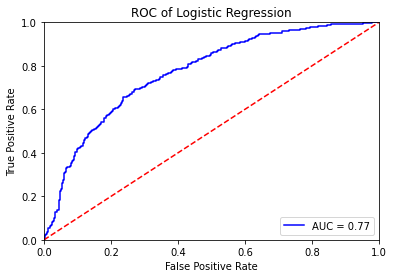

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = m1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC of Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()